In [1]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
import IPython.display as disp

N = CoordSys3D('N')

t, k = symbols( 't k' )
n, d, m = symbols('n d m', positive=True, integer=True)
init_printing(use_latex='mathjax')

# Define a vector which is not parallel to any edge vector (non-degeneracy), which will eventually be sent to zero:

Phi = t*(N.i + 2*N.j)

# Set the fixed points of the action; P denotes those that belong
# to the core, and Q those that come from the cut extended core:

# Define the interior points which make up the vertices to the core:

def P12(k,a):
    return Vector.zero

def P23(k,a):
    return k*N.i

def P34(k,a):
    return k*N.i + k*N.j

def P14(k,a):
    return k*N.j

# Exterior points coming from the cut:

def Q12_1(k,a):
    return -a*N.j

def Q12_2(k,a):
    return -a*N.i

def Q23_2(k,a):
    return (k+a)*N.i

def Q23_3(k,a):
    return k*N.i - a*N.j

def Q34_3(k,a):
    return k*N.i + (k+a)*N.j

def Q34_4(k,a):
    return (k+a)*N.i + k*N.j

def Q14_1(k,a):
    return (k+a)*N.j

def Q14_4(k,a):
    return -a*N.i + k*N.i

# Basis for the edge/weight vectors for the points 

v1 = N.i

v2 = N.j

# Define the term which is summed over each fixed point,
# representing the character for the representation

def f(P, edge1, edge2):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) )

def g(P, edge1, edge2, edge3, edge4):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) * ( 1 - exp( Phi.dot(edge3) ) ) * ( 1 - exp( Phi.dot(edge4) ) ) )

# For each of the right-angled triangles:
# Delta34 is the bottom-left simplex:

def Delta34(k,a):
    return f( P12(k,a), v1, v2 ) * ( f( Vector.zero, -v1, -v2 ) + f( -a*v1, v1, v1 - v2 ) + f( -a*v2, v2, -v1 + v2 ) )

# Delta14 is the bottom-right simplex:

def Delta14(k,a):
    return f( P23(k,a), -v1, v2 ) * ( f( Vector.zero, v1, -v2 ) + f( a*v1, -v1, -v1 - v2 ) + f( -a*v2, v1 + v2, v2 ) )

# Delta12 is the top-right simplex:

def Delta12(k,a):
    return f( P34(k,a), -v1 , -v2 ) * ( f( Vector.zero, v1, v2 ) + f( a*v1, -v1 + v2, -v1 ) + f( a*v2, v1 - v2, -v2 ) )

# Delta23 is the top-left simplex:

def Delta23(k,a):
    return f( P14(k,a), v1 , -v2 ) * ( f( Vector.zero, v2, -v1 ) + f( -a*v1, v1, v1 + v2 ) + f( a*v2, -v1 - v2, -v2 ) )

# And their sum:

def Sum(k,a):
    return Delta34(k,a) + Delta14(k,a) + Delta12(k,a) + Delta23(k,a)

# Take the limit as t -> 0 to get the Euler characteristic(?):

def SumLimit(k,a):
    return limit(Sum(k,a),t,0)


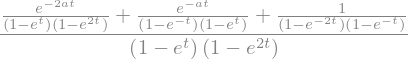

In [2]:
Delta34(k,a) # The bottom-left simplex

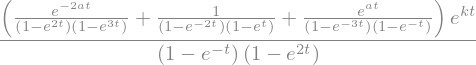

In [3]:
Delta14(k,a) # The bottom-right simplex

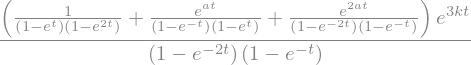

In [4]:
Delta12(k,a) # The top-right simplex

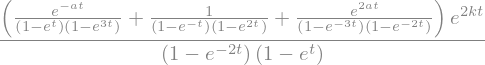

In [5]:
Delta23(k,a) # The top-left simplex

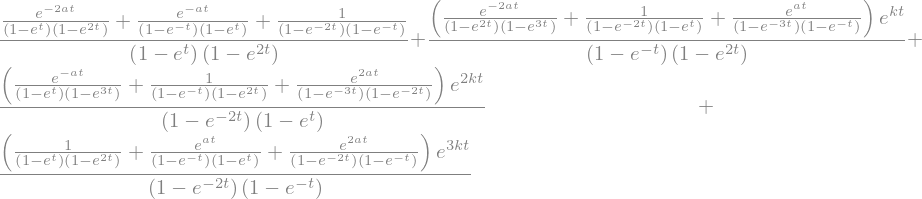

In [6]:
Sum(k,a) # Take their sum

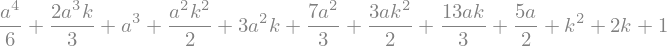

In [7]:
SumLimit(k,a) # And let ϕ tend to zero

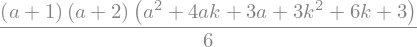

In [8]:
factor(SumLimit(k,a))

In [9]:
def Euler(k,a):    
    return factor(( Rational(1, 6) * (a + 1) * (a + 2) * (a**2 + 4*a*k + 3*a + 3*k**2 + 6*k + 3) ))


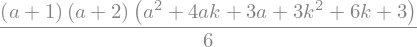

In [10]:
Euler(k,a)

In [11]:
# Calculate the lattice points by hand:

def AuxiliaryLatticePoints(k,a):
    return (k + 2*a + 1)**2 - 4 * ( ( Rational(1, 2) * (a+1) * (a + 2) ) - (a + 1) )

def LatticePoints(k,a):
    return factor(AuxiliaryLatticePoints(k,a))

In [12]:
LatticePoints(k,a)

In [13]:
LatticePoints(k,0)

In [14]:
LatticePoints(k,1)     # Is equal to (k+1)^{2} + 4(k+1)

In [15]:
Euler(k,0)

In [16]:
Euler(3,1)

In [17]:
for a in range(0, 5):
    disp.display(Euler(k,a))
    
a = symbols('a')

In [18]:
for a in range(0, 5):
    disp.display(Euler(3,a))
    
a = symbols('a')

In [20]:
# Different of the a-level and the (a-1)-level of the cut for the Euler characteristic:
def CutDiff(k,a):
    return factor(Euler(k,a) - Euler(k,a-1))

CutDiff(k,a)

In [21]:
for a in range(0, 10):
    disp.display(simplify(CutDiff(k,a)))